## 필요한 Library import

In [4]:
import requests 
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime
import time
import re

## 네이버 뉴스에서 '부동산 대책 검사' 해 5페이지까지 기사 URL 수집

In [5]:
query = '부동산+대책'
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+query 

urls_list = [] #기사 url 담을 list
for i in range(4): #0~4=> 5페이지까지
    url=url+"&start="+str(i*10+1) 

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"): # 네이버 기사만 담기
            urls_list.append(urls["href"])


## Selenium 과 BeautifulSoup <mark>이용한 기사의 댓글 수집</mark> 

In [6]:

from selenium import webdriver

from bs4 import BeautifulSoup

import time


driver = webdriver.Chrome('./chromedriver') 
comments=[] #댓글들 담을 list
for url in urls_list:
    try:
        print(url+' 크롤링중')
        driver.get(url+'&m_view=1&includeAllCount=true') #댓글 페이지
        time.sleep(3) #댓글 불러오는 거 기다리기

        try:
            for i in range(0, 2) : #댓글 더보기 2페이지만
                driver.find_element_by_css_selector(".u_cbox_btn_more").click() #댓글 더보기 클릭
                time.sleep(3)
                i +=1



            html = driver.page_source

            bs = BeautifulSoup(html, 'html.parser')
        
            contents = bs.find_all("span", {"class" : "u_cbox_contents"}) #댓글 담긴 span tag 찾기
            for content in contents :
                comments.append(content.text)

        except: 
            print("댓글 2페이지까지 없어")
    except:
        print("없는 url")

print(comments)



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=055&aid=0000779436 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=025&aid=0002961267 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=014&aid=0004344799 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=023&aid=0003494200 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=215&aid=0000832238 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=022&aid=0003423147 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=469&aid=0000449640 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=032&aid=0002981303 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=047&aid=0002250186 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=020&aid=0003259416 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=277&aid=0004591342 크롤링중

## 댓글 리스트 <mark>join 함수</mark> 이용해 한 문자열로 

In [7]:
comments_str=" ".join(comments) #댓글 string으로

comments_str

'서울시상 급여는 최저임수준으로 낮추어야합니다.박원순시장 말고도  잘 할사람 많습니다. 10년 가까운 세월동안 서울시 경쟁력 망가트린 못난이 그런대도 시장 노릇을 하고 있으니 이게 서울의 민도인가... 하기사 지방선거 대부분이 북풍 영향 받아 싹쓸이 좌파세상으로 변했지. 아들이나 찾아라 이것아.. 뭔 애비가 자식 어디 있는지 모른다 시침이를 떼는것인지. 사회주의화 되는 서울시를 더는 못 보것다 김현미장관과 비슷하게 시장을 잘못 파악하고 있구먼... 그런 식견으로 무슨 대권을 넘보시나? 시골내려가셔서 이장님 하시면 딱인데... 시민의 혈세를 물쓰듯 펑펑 쓰는 박원순 시장은 퇴진하라. 왜 차라리 몰수해서 정은이에게 바치지 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ지는 재산 다 돌려놓고 마이너스라고 저지랄하네 재산이 마이너스인데 어찌 그리 고급품만 갖고 사냐?그리고 아들새끼 유학은 어떻게 보냈냐? 아직도 아들 못찾았어? 정권 빨리 바뀌었음 좋겠다. 온 나라가 혼란 뒤숭숭..정치 경제 안보 민생 불안하고 바람잘날 없네. 못살겠다 진짜 사회주의가 정권을 잡으면 하향평준화로 고만고만해진다이게 좋나 기회만 공정하면되지 왜 결과가 공정해야하지 북한인가 북한이 좋으면 제발그리로 가라 좌파놈들 세금 뜯어내서 국민은 가난하게 만들은 ㄱ지들이 펑펑 쓰며 해처먹는 거 다 안다. 경제효과는? 나라 점점 더 가난해짐. 박원순이 지난 12년간 서울에 뭔 짓을 했는지 서울은 점점 퇴보하는데 집값만 폭등함 기생충들만 살찌고 국민은 점점가난해 지는 아이러니 민주당인사들은 말만 번지르르하고 서민들 위하는척하지만 하는거보면  한국당놈들보다 더 교활하고 악랄해....... 미세먼지 잡는다고 160억 세금을 3일 무료교통으로 쓴 인간머리에서나 나올법한 얘기네 집값폭등은 공감합니다만 해법은 사회주의생각같아 씁쓸합니다.  정책당국자의 잘못이지 서울에 집갖고 사는사람이 무슨죄를 지었나요? 취,등록세는 OECD평균보다 5배 높다고합니다. 그럼 5배 인하해서, 평균정도라도 맞춰야하는거 아닌가요?내릴거부터 내리고, 올려야하는거

In [8]:
# comments_str 저장
save=open("naver_comments.txt", 'w' , encoding='utf-8' )
save.write(comments_str)
save.close()

## 단어 정규화 및 어근화, 품사 태깅

In [9]:
from collections import Counter
from konlpy.tag import Twitter

twitter = Twitter()
raw_pos_tagged = twitter.pos(comments_str, norm=True, stem=True)

# raw_pos_tagged

# 조사, 어미, 구두점을 제외한 나머지 단어들을 모두 word_cleaned 리스트에 담습니다.
# 유의미한 의미를 갖고 있지 않은 단어를 제외할 수 있습니다.
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다','어떻다','ㅋㅋ','ㅋㅋㅋ','ㅠㅠ','ㅉㅉ','ㅎㅎ','없다','위해','완전','절대','그게','아무','건가','나다','모두','이미','저런','같다'] #삭제할 것들
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign","Adverb","Suffix"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            if(word[0].isalpha()): #숫자 뺌
                word_cleaned.append(word[0])



/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [10]:
word_cleaned

['서울시',
 '급여',
 '최저',
 '수준',
 '낮추다',
 '야하다',
 '박원순',
 '시장',
 '자다',
 '사람',
 '많다',
 '가깝다',
 '세월',
 '동안',
 '서울시',
 '경쟁력',
 '가트',
 '못난이',
 '그런',
 '대도',
 '시장',
 '노릇',
 '서울',
 '도인',
 '지방선거',
 '대부분',
 '북풍',
 '영향',
 '받다',
 '쓸다',
 '좌파',
 '세상',
 '변하다',
 '아들',
 '찾다',
 '애비',
 '자식',
 '어디',
 '모르다',
 '시침',
 '떼다',
 '사회주의',
 '서울시',
 '보다',
 '김현미',
 '장관',
 '비슷하다',
 '시장',
 '잘못',
 '파악',
 '식견',
 '무슨',
 '대권',
 '넘다',
 '보시',
 '시골',
 '내려가다',
 '이장님',
 '딱이다',
 '시민',
 '혈세',
 '쓰다',
 '펑펑',
 '쓰다',
 '박원순',
 '시장',
 '퇴진',
 '차라리',
 '몰수',
 '정은',
 '바치',
 '지다',
 '재산',
 '돌리다',
 '마이너스',
 '지랄',
 '재산',
 '마이너스',
 '어찌',
 '그리다',
 '고급',
 '갖다',
 '사다',
 '그리고',
 '아들',
 '새끼',
 '유학',
 '보내다',
 '아들',
 '찾다',
 '정권',
 '바뀌다',
 '좋다',
 '나라',
 '혼란',
 '숭숭',
 '정치',
 '경제',
 '안보',
 '민생',
 '불안하다',
 '바람',
 '잘나다',
 '살다',
 '진짜',
 '사회주의',
 '정권',
 '잡다',
 '하향',
 '평준화',
 '고만고만하다',
 '좋다',
 '기회',
 '공정하다',
 '지다',
 '결과',
 '공정하다',
 '북한',
 '북한',
 '좋다',
 '제발',
 '가라',
 '좌파',
 '세금',
 '뜯다',
 '국민',
 '가난하다',
 '만들다',
 '지다',
 '들이다',
 '펑펑',
 '쓰다',
 '해처',
 '먹다',
 '안다',
 '효

## 단어 등장 빈도 Counting

In [21]:
word_counted = Counter(word_cleaned)
word_dic = dict(word_counted)
        
sorted_word = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

# 빈도 순으로 상위 100개에 해당하는 단어까지만 추려내기
top100_words= sorted_word[:100] 
type(top100_words)

# dict type으로 저장
top100_words_dic = dict(top100_words)

In [22]:
# print(top100_words_dic)
# top100_words_dic

{'세금': 588, '부동산': 464, '사람': 333, '정책': 300, '집값': 291, '올리다': 270, '국민': 244, '서울': 242, '시장': 239, '정부': 231, '살다': 221, '보다': 206, '정권': 199, '주택': 197, '종부세': 186, '투기': 178, '생각': 177, '지다': 176, '박원순': 167, '믿다': 154, '오르다': 152, '아파트': 145, '들다': 143, '잡다': 140, '나라': 138, '내다': 138, '가다': 131, '시키다': 131, '만들다': 130, '유세': 128, '원숭이': 120, '공급': 113, '폭등': 111, '하나': 110, '서울시장': 110, '들이다': 106, '그냥': 105, '시민': 103, '인간': 101, '쓰다': 100, '국가': 100, '알다': 96, '걷다': 95, '주다': 95, '모르다': 91, '이상': 90, '야하다': 89, '경제': 89, '문재인': 89, '대출': 88, '신뢰': 88, '넘다': 87, '나오다': 87, '뽑다': 85, '누가': 84, '치다': 83, '진짜': 82, '무슨': 80, '좋다': 80, '강남': 80, '많다': 78, '전세': 78, '받다': 76, '이제': 74, '사회주의': 72, '서민': 72, '안되다': 71, '때문': 70, '사다': 69, '가격': 69, '맞다': 69, '먹다': 68, '규제': 68, '때리다': 68, '미치다': 68, '문제': 66, '아들': 64, '정말': 64, '부자': 64, '지금': 61, '대통령': 61, '떨어지다': 60, '공산주의': 60, '소리': 59, '서울시': 58, '자다': 58, '수준': 56, '거래': 56, '진보': 56, '인상': 52, '해주다': 52, '죽다': 52, '싶다': 52, 

{'세금': 588,
 '부동산': 464,
 '사람': 333,
 '정책': 300,
 '집값': 291,
 '올리다': 270,
 '국민': 244,
 '서울': 242,
 '시장': 239,
 '정부': 231,
 '살다': 221,
 '보다': 206,
 '정권': 199,
 '주택': 197,
 '종부세': 186,
 '투기': 178,
 '생각': 177,
 '지다': 176,
 '박원순': 167,
 '믿다': 154,
 '오르다': 152,
 '아파트': 145,
 '들다': 143,
 '잡다': 140,
 '나라': 138,
 '내다': 138,
 '가다': 131,
 '시키다': 131,
 '만들다': 130,
 '유세': 128,
 '원숭이': 120,
 '공급': 113,
 '폭등': 111,
 '하나': 110,
 '서울시장': 110,
 '들이다': 106,
 '그냥': 105,
 '시민': 103,
 '인간': 101,
 '쓰다': 100,
 '국가': 100,
 '알다': 96,
 '걷다': 95,
 '주다': 95,
 '모르다': 91,
 '이상': 90,
 '야하다': 89,
 '경제': 89,
 '문재인': 89,
 '대출': 88,
 '신뢰': 88,
 '넘다': 87,
 '나오다': 87,
 '뽑다': 85,
 '누가': 84,
 '치다': 83,
 '진짜': 82,
 '무슨': 80,
 '좋다': 80,
 '강남': 80,
 '많다': 78,
 '전세': 78,
 '받다': 76,
 '이제': 74,
 '사회주의': 72,
 '서민': 72,
 '안되다': 71,
 '때문': 70,
 '사다': 69,
 '가격': 69,
 '맞다': 69,
 '먹다': 68,
 '규제': 68,
 '때리다': 68,
 '미치다': 68,
 '문제': 66,
 '아들': 64,
 '정말': 64,
 '부자': 64,
 '지금': 61,
 '대통령': 61,
 '떨어지다': 60,
 '공산주의': 60,
 '소리': 59,
 '서울시': 5

## WordCloud 만들기

In [23]:
#워드 클라우드
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

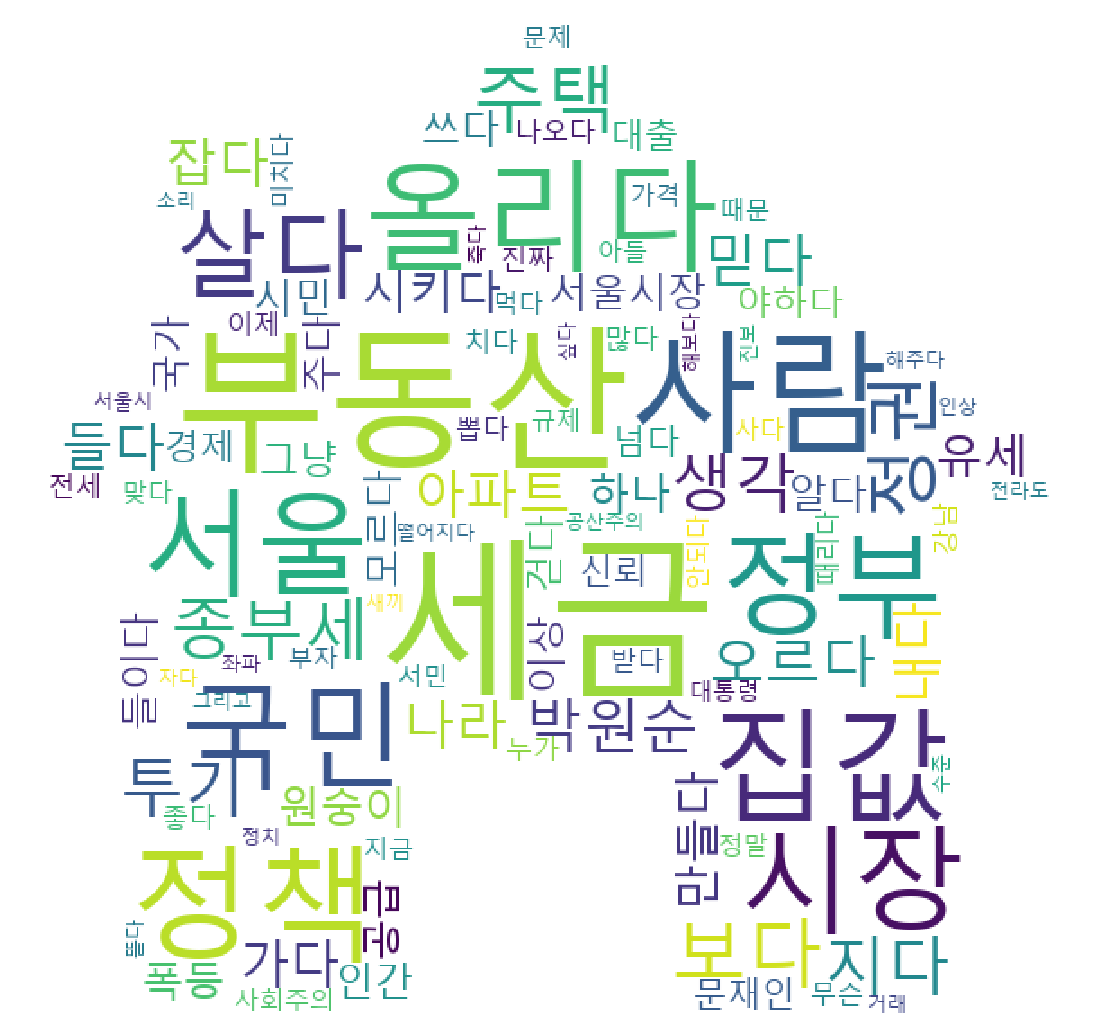

In [28]:
# from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

# coloring = np.array(Image.open("./yellow-house.png"))
image_colors = ImageColorGenerator(coloring)

word_cloud = WordCloud(font_path="fonts/malgun.ttf", 
                       width=2000, height=1000,  
                       mask=coloring, 
                       background_color='white').generate_from_frequencies(top100_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud) 
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [29]:
word_cloud.to_file("word_cloud_coloring.png")